<a href="https://colab.research.google.com/github/JonPaulBIlbao/Machine-Learning-in-Finance-Python-2026/blob/main/00.%20Intro%20to%20Python/Churn_EDA_Intro_Academic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning in Finance**
**Deusto Business School**

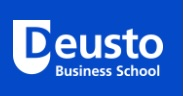

ADE + FAB

---

# Exploratory Data Analysis in Python: Customer Churn

This notebook introduces basic **exploratory data analysis (EDA)** in Python using the USA Telecom churn dataset.
It is designed for students in the *Machine Learning in Finance* course who have previously studied descriptive and inferential statistics using tools such as Excel or SPSS and are now transitioning to a **Python-based workflow**.


### Learning objectives

By the end of this notebook you should be able to:

- Load a rectangular dataset into Python using `pandas`.
- Inspect the structure and main variables of the churn dataset.
- Compute basic descriptive statistics and frequency tables.
- Visualise key distributions and proportions (histograms and bar charts).
- Explore how churn behaviour varies across customer subgroups (e.g. tariffs, voice mail, customer service calls).
- Perform and interpret a simple chi-square test of independence.

These skills provide the foundation for later modules on **logistic regression**, **decision trees**, and **random forests**, where we will build predictive churn models.


## 1. Importing Python libraries

In [19]:
# Import core libraries for data analysis and visualisation
import pandas as pd          # data handling and tables
import numpy as np           # numerical operations
import seaborn as sns        # statistical visualisation
import matplotlib.pyplot as plt  # plotting

# Configure plotting style
sns.set(style="whitegrid")


## 2. Loading the churn dataset

In this course we will repeatedly work with a customer churn dataset from a fictitious telecom company (USA Telecom).
For reproducibility, we store the dataset as a CSV file in a GitHub repository and load it directly from there.


In [20]:
# Data location:
data_url = "https://raw.githubusercontent.com/JonPaulBIlbao/ML-Finance-DBS/refs/heads/Machine-Learning-in-Finance-DBS/logistic_regression/churn.csv"

# Load the dataset into a pandas DataFrame
data = pd.read_csv(data_url)

# Display the shape of the dataset (rows, columns)
data.shape

(3333, 21)

### 2.1 First look at the data

We start by inspecting the first rows of the dataset to understand the structure, variable names and typical values.


In [21]:
# Display the first five observations
data.head()

,State,Account_Length,Area_Code,Phone,Intl_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Day_Charge,...,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,Intl_Mins,Intl_Calls,Intl_Charge,CustServ_Calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


### 2.2 Key variables in the churn dataset

Some of the most relevant variables in this dataset are:

- `State`: US state where the customer lives.  
- `Account Length`: number of days the account has been active.  
- `Area Code`: telephone area code.  
- `Intl Plan`: whether the customer has an international calling plan (`Yes` / `No`).  
- `VMail Plan`: whether the customer has a voice mail plan (`Yes` / `No`).  
- `Day Mins`, `Eve Mins`, `Night Mins`: minutes of use during day, evening and night.  
- `Day Charge`, `Eve Charge`, `Night Charge`: corresponding charges in US dollars.  
- `CustServ Calls`: number of calls the customer has made to the customer service centre.  
- `Churn`: **target variable**, indicating whether the customer has left the company (`True`) or stayed (`False`).

In this notebook we focus on **describing** and **visualising** these variables, not yet on prediction.


## 3. Descriptive statistics

In [4]:
# Summary statistics for numerical variables
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Account_Length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
Area_Code,3333.0,437.182418,42.371290,408.00,408.00,415.00,510.00,510.00
VMail_Message,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
Day_Mins,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
Day_Calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
Day_Charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
Eve_Mins,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
Eve_Calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
Eve_Charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
Night_Mins,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00


### 3.1 Overall churn rate

We begin with the marginal distribution of the target variable `Churn`.  
This tells us what proportion of customers have left the company in the observed period.


In [5]:
# Frequency table for the churn variable
churn_counts = data['Churn'].value_counts()
churn_counts

,count
Churn,
False,2850
True,483


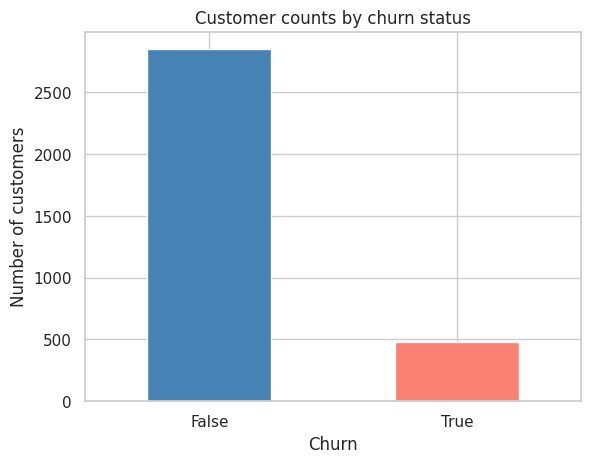

In [6]:
# Bar chart of churn vs non-churn
churn_counts.plot(kind='bar', color=['steelblue', 'salmon'])
plt.xlabel('Churn')
plt.ylabel('Number of customers')
plt.title('Customer counts by churn status')
plt.xticks(rotation=0)
plt.show()

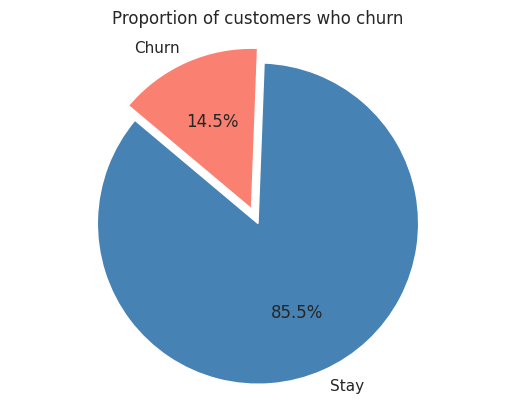

In [7]:
# Pie chart of churn proportions
labels = ['Stay', 'Churn']
colors = ['steelblue', 'salmon']
explode = (0.05, 0.05)  # highlight both slices slightly

plt.pie(churn_counts, labels=labels, colors=colors,
        explode=explode, autopct='%1.1f%%', shadow=False, startangle=140)
plt.axis('equal')  # equal aspect ratio -> pie drawn as a circle
plt.title('Proportion of customers who churn')
plt.show()

### 3.2 Distribution of daytime charges

As a first example of univariate analysis, we inspect the distribution of `Day Charge`, the total charge for daytime calls in a billing period.


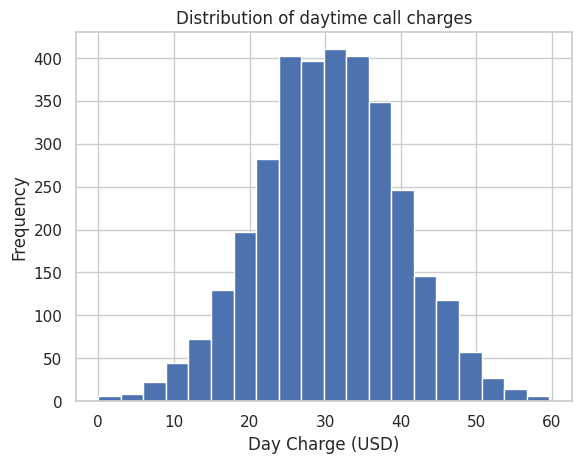

In [23]:
# Histogram of daytime charges
plt.hist(data['Day_Charge'], bins=20)
plt.xlabel('Day Charge (USD)')
plt.ylabel('Frequency')
plt.title('Distribution of daytime call charges')
plt.show()

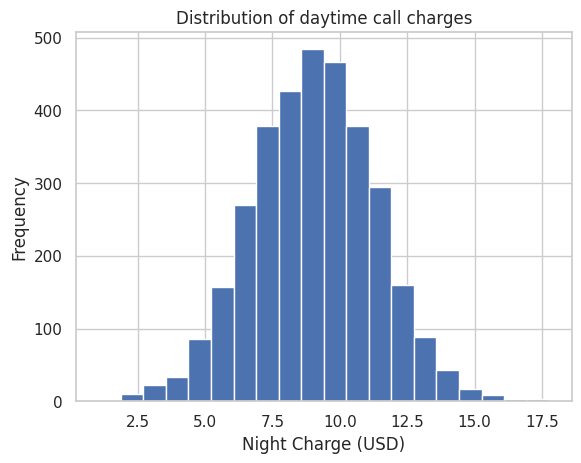

In [24]:
# Histogram of daytime charges
plt.hist(data['Night_Charge'], bins=20)
plt.xlabel('Night Charge (USD)')
plt.ylabel('Frequency')
plt.title('Distribution of daytime call charges')
plt.show()

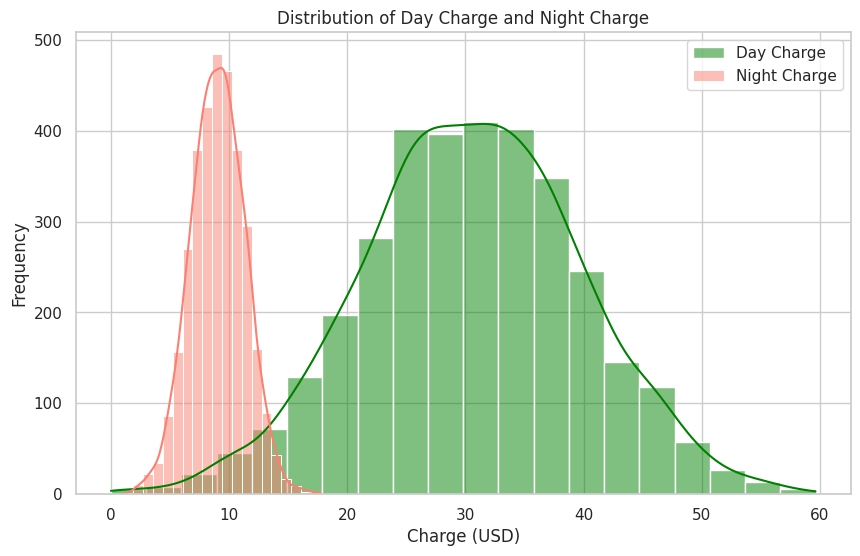

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and an axes object
plt.figure(figsize=(10, 6))

# Plot histogram for Day_Charge
sns.histplot(data['Day_Charge'], bins=20, color='green', label='Day Charge', kde=True)

# Plot histogram for Night_Charge
sns.histplot(data['Night_Charge'], bins=20, color='salmon', label='Night Charge', kde=True)

plt.xlabel('Charge (USD)')
plt.ylabel('Frequency')
plt.title('Distribution of Day Charge and Night Charge')
plt.legend()
plt.show()

## 4. Churn by customer segments

Customer churn rarely occurs at random. It is typically related to tariffs, usage patterns, or problems experienced by the customer.
We start by exploring how churn varies across simple categorical segments.


### 4.1 Churn and International Plan

We first analyse whether customers subscribed to the **International Plan** tend to churn more frequently than customers without the plan.

We compute the *churn rate* within each group, defined as:

\[
\text{churn rate} = \frac{\text{number of churned customers}}{\text{total customers in the group}}.
\]


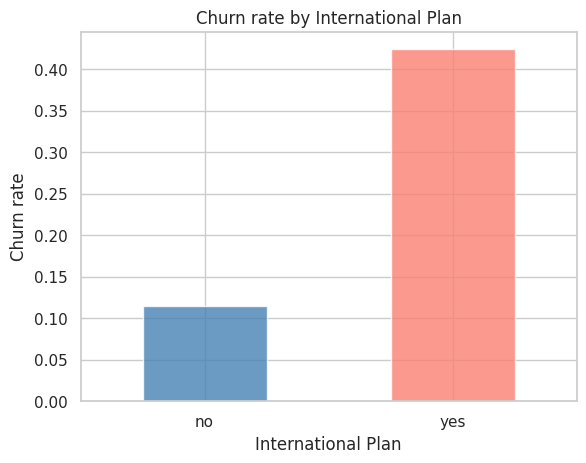

,Churn
Intl_Plan,
no,0.114950
yes,0.424149


In [28]:
# Churn rate by international plan (Yes/No)
churn_by_intl_plan = data.groupby('Intl_Plan')['Churn'].mean()

churn_by_intl_plan.plot(kind='bar', color=['steelblue', 'salmon'], alpha=0.8)
plt.title('Churn rate by International Plan')
plt.ylabel('Churn rate')
plt.xlabel('International Plan')
plt.xticks(rotation=0)
plt.show()

churn_by_intl_plan

### 4.2 Churn and Voice Mail Plan

We repeat the same analysis for the **Voice Mail Plan** to see whether having voice mail is related to customer retention.


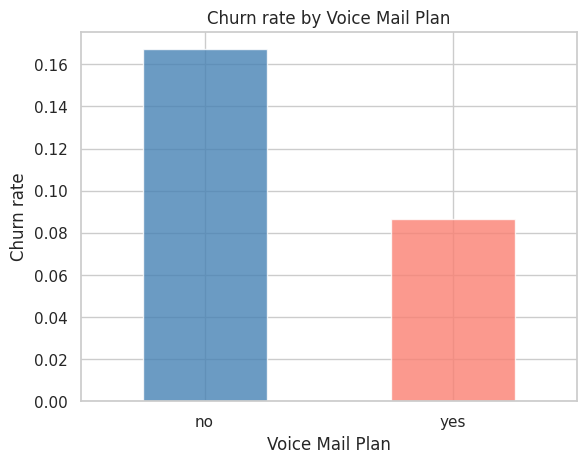

,Churn
VMail_Plan,
no,0.167151
yes,0.086768


In [29]:
# Churn rate by voice mail plan
churn_by_vmail_plan = data.groupby('VMail_Plan')['Churn'].mean()

churn_by_vmail_plan.plot(kind='bar', color=['steelblue', 'salmon'], alpha=0.8)
plt.title('Churn rate by Voice Mail Plan')
plt.ylabel('Churn rate')
plt.xlabel('Voice Mail Plan')
plt.xticks(rotation=0)
plt.show()

churn_by_vmail_plan

### 4.3 Churn and calls to customer service

Finally, we look at the relationship between churn and the number of calls made to the customer service centre.
A high number of service calls may be a sign of dissatisfaction and therefore associated with higher churn.


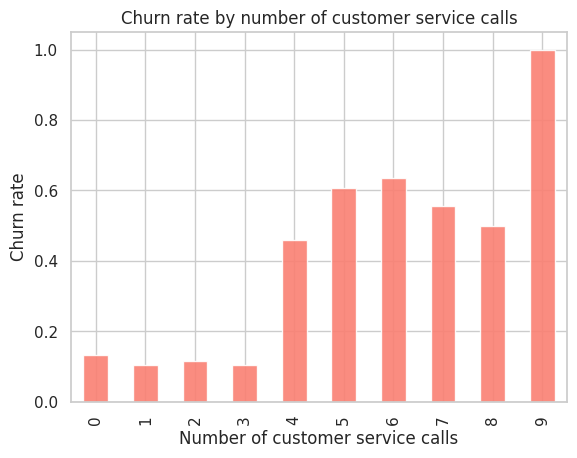

,Churn
CustServ_Calls,
0,0.131994
1,0.103302
2,0.114625
3,0.102564
4,0.457831
5,0.606061
6,0.636364
7,0.555556
8,0.500000


In [32]:
# Churn rate by number of customer service calls
churn_by_custserv_calls = data.groupby('CustServ_Calls')['Churn'].mean()

churn_by_custserv_calls.plot(kind='bar', color='salmon', alpha=0.9)
plt.title('Churn rate by number of customer service calls')
plt.ylabel('Churn rate')
plt.xlabel('Number of customer service calls')
plt.show()

churn_by_custserv_calls

### 4.4 States with the highest churn rate

As an illustration of geographical variation, we compute the churn rate by `State` and inspect the states with the highest values.


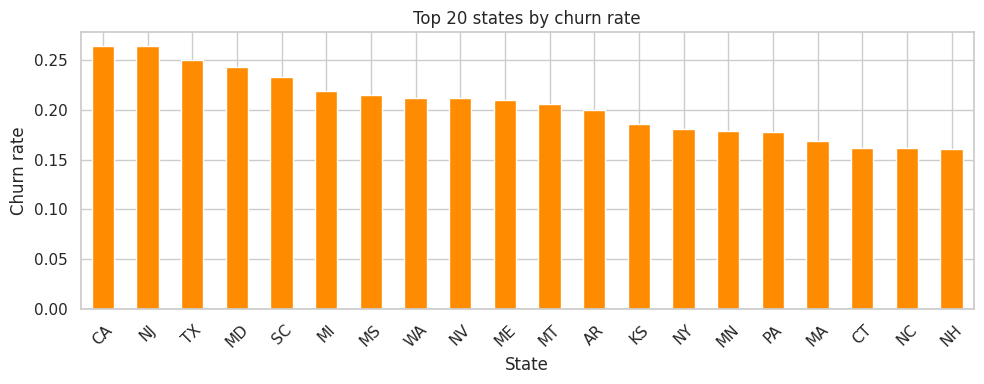

,Churn
State,
CA,0.264706
NJ,0.264706
TX,0.250000
MD,0.242857
SC,0.233333
MI,0.219178
MS,0.215385
WA,0.212121
NV,0.212121


In [13]:
# Churn rate by state
churn_by_state = data.groupby('State')['Churn'].mean().sort_values(ascending=False)

# Plot the top 20 states by churn rate
top_states = churn_by_state.head(20)

top_states.plot(kind='bar', figsize=(10,4), color='darkorange')
plt.title('Top 20 states by churn rate')
plt.ylabel('Churn rate')
plt.xlabel('State')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

top_states

## 5. Exploring relationships between usage variables

We now move briefly from simple group comparisons to the joint behaviour of continuous variables such as minutes, calls and charges.
Scatterplot matrices (*pairplots*) allow us to visualise correlations and potential non-linear patterns.


### 5.1 Daytime usage variables by churn status

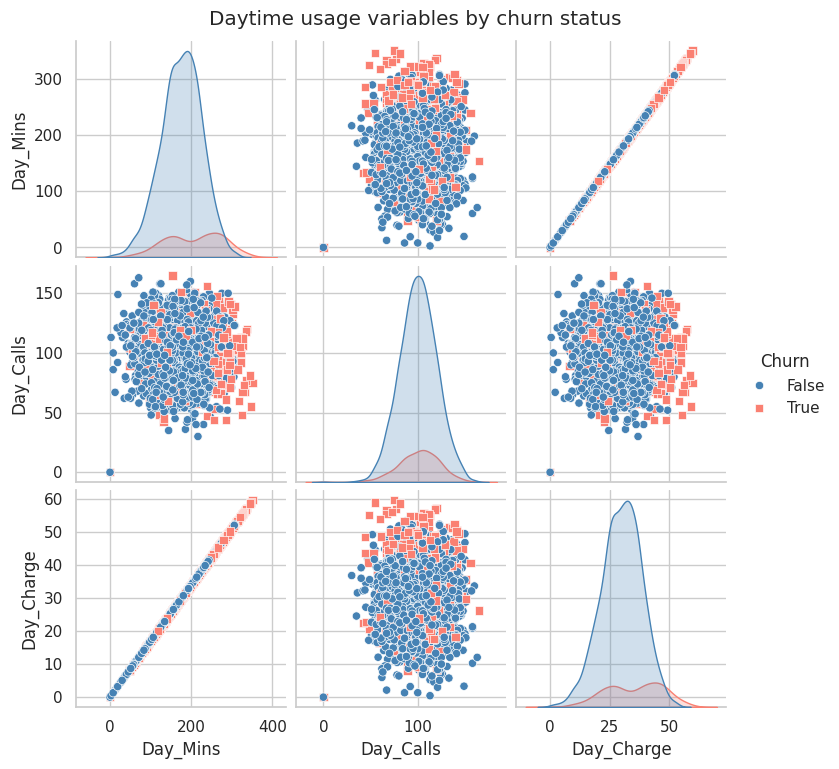

In [14]:
# Select daytime usage variables (example: columns starting with 'Day')
day_cols = [col for col in data.columns if col.startswith('Day')]

# Pairplot of daytime variables, coloured by churn status
sns.pairplot(data=data, vars=day_cols, hue='Churn',
             palette={True: 'salmon', False: 'steelblue'},
             markers=['o', 's'])
plt.suptitle('Daytime usage variables by churn status', y=1.02)
plt.show()

### 5.2 Nightime usage variables by churn status

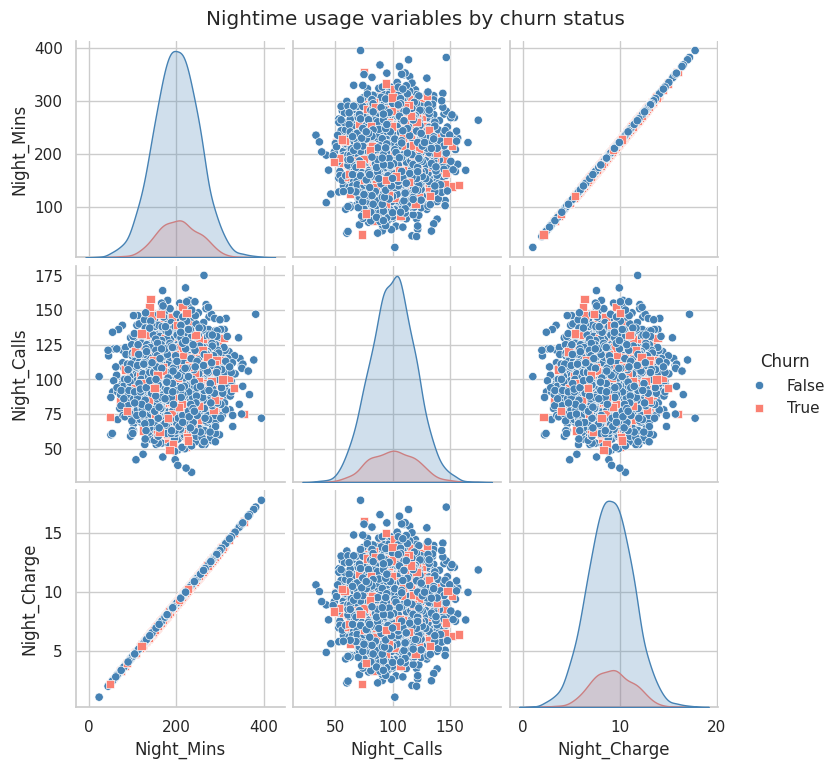

In [ ]:
# Select daytime usage variables (example: columns starting with 'Day')
day_cols = [col for col in data.columns if col.startswith('Night')]

# Pairplot of daytime variables, coloured by churn status
sns.pairplot(data=data, vars=day_cols, hue='Churn',
             palette={True: 'salmon', False: 'steelblue'},
             markers=['o', 's'])
plt.suptitle('Nightime usage variables by churn status', y=1.02)
plt.show()

## 6. A first chi-square test of independence

To go beyond graphical inspection, we can test formally whether there is an association between **churn** and a categorical explanatory variable, such as the **International Plan**.

We use the chi-square test of independence applied to a contingency table of counts.


In [16]:
from scipy.stats import chi2_contingency, chi2

# Contingency table: rows = Intl Plan (Yes/No), columns = Churn (False/True)
contingency_table = pd.crosstab(data['Intl_Plan'], data['Churn'])
contingency_table

Churn,False,True
Intl_Plan,,
no,2664,346
yes,186,137


In [17]:
# Perform chi-square test of independence
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2_stat:.2f}")
print(f"Degrees of freedom: {dof}")
print(f"p-value: {p_value:.4f}")

Chi-square statistic: 222.57
Degrees of freedom: 1
p-value: 0.0000


The chi-square statistic measures the discrepancy between the **observed** cell counts and the counts we would expect if `Intl Plan` and `Churn` were independent.

A very large chi-square statistic together with a small p-value provides evidence **against** the null hypothesis of independence.


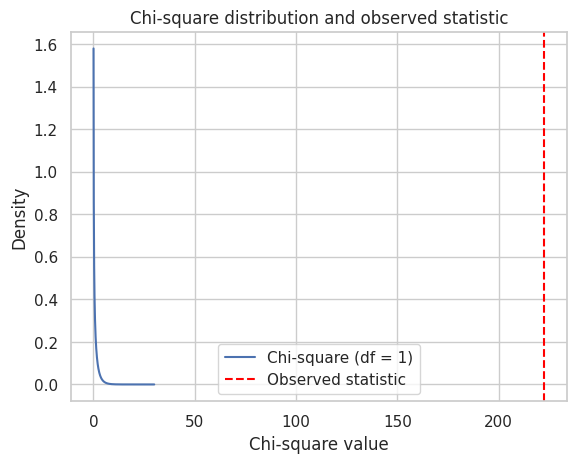

In [18]:
# Optional: visualise the chi-square distribution for comparison
df = contingency_table.size - contingency_table.shape[0] - contingency_table.shape[1] + 1  # alternative DF formula
x = np.linspace(0, 30, 500)
pdf = chi2.pdf(x, df=df)

plt.plot(x, pdf, label=f'Chi-square (df = {df})')
plt.axvline(chi2_stat, color='red', linestyle='--', label='Observed statistic')
plt.xlabel('Chi-square value')
plt.ylabel('Density')
plt.title('Chi-square distribution and observed statistic')
plt.legend()
plt.show()

## 7. Summary

In this notebook we have:

- Loaded the USA Telecom churn dataset into Python using `pandas`.
- Reviewed the main variables and computed basic descriptive statistics.
- Described the overall churn rate and visualised it with bar and pie charts.
- Compared churn rates across meaningful customer segments (tariffs, voice mail, customer service usage, states).
- Used pairplots to explore relationships between usage variables, conditional on churn status.
- Performed a first chi-square test of independence between churn and subscription to the International Plan.

These exploratory techniques are essential before fitting any **predictive model**. In the next sessions we will build on this analysis to estimate logistic regression models that predict churn and to compare them with tree-based methods.
